In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib

In [2]:
# show as plt
def imshow(img, cmap=None):
    if cmap == "bgr":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cmap = None
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap=cmap)
    plt.axis("off")
    plt.show()

In [3]:
# show in separate window
def imshow_cv2(window_name, img):
    cv2.namedWindow(window_name, cv2.WINDOW_KEEPRATIO)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Test with photos

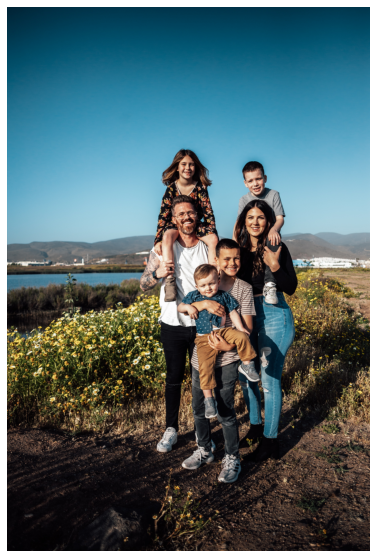

In [4]:
# read image
people = cv2.imread("images/people.jpg")
imshow(people, "bgr")

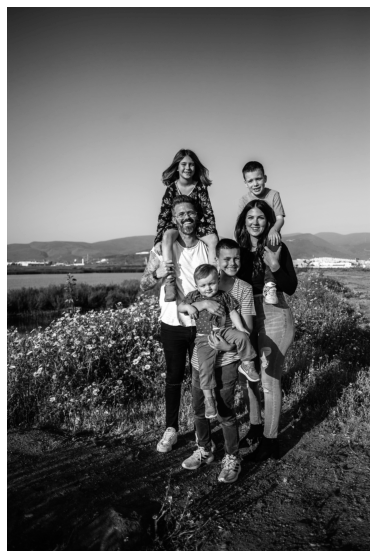

In [5]:
# convert image to grayscale
people_gray = cv2.cvtColor(people, cv2.COLOR_RGB2GRAY)
imshow(people_gray, "gray")

In [6]:
imshow_cv2("people", people_gray)

In [7]:
# load the detector
detector = dlib.get_frontal_face_detector()

In [8]:
# use detector to find landmarks
faces = detector(people_gray)
faces

rectangles[[(2372, 2057) (2630, 2315)], [(1727, 1528) (1906, 1707)], [(2144, 2478) (2359, 2693)], [(2383, 1690) (2598, 1905)], [(1690, 2024) (1905, 2239)], [(1929, 2717) (2144, 2932)]]

In [9]:
# draw rectangles around faces
people_faces = people.copy()
for face in faces:
    # left point
    x1 = face.left()
    # top point
    y1 = face.top()
    # right point
    x2 = face.right()
    # bottom point
    y2 = face.bottom()
    
    cv2.rectangle(img=people_faces, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=5)

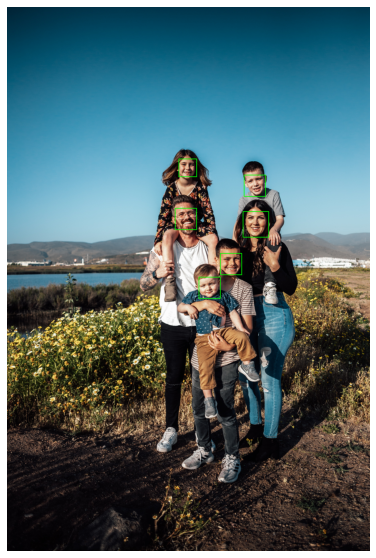

In [10]:
imshow(people_faces, "bgr")

In [11]:
# load the predictor
predictor = dlib.shape_predictor("predictors/shape_predictor_68_face_landmarks.dat")

In [12]:
# draw circle on selected keypoint
keypoint = 30
people_kp = people.copy()
for face in faces:
    # look for the landmarks
    landmarks = predictor(image=people_gray, box=face)
    x = landmarks.part(keypoint).x
    y = landmarks.part(keypoint).y

    # draw a circle
    cv2.circle(img=people_kp, center=(x, y), radius=10, color=(0, 255, 0), thickness=-1)

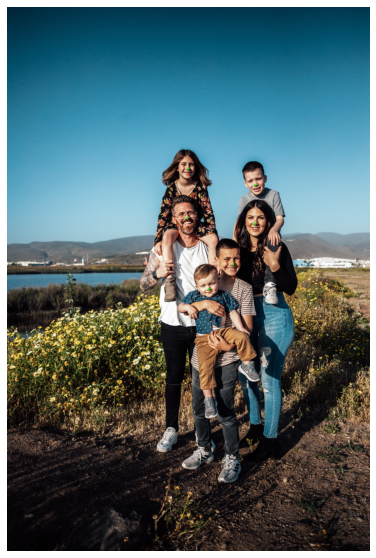

In [13]:
imshow(people_kp, "bgr")

In [14]:
# draw all the keypoints from range
kp_range = range(0, 68)
# kp_range = range(36, 48)
faces_keypoints = people.copy()
for face in faces:
    # look for the landmarks
    landmarks = predictor(image=people_gray, box=face)
    
    for i in kp_range:
        x = landmarks.part(i).x
        y = landmarks.part(i).y

        # draw a circle
        cv2.circle(img=faces_keypoints, center=(x, y), radius=5, color=(0, 255, 0), thickness=-1)

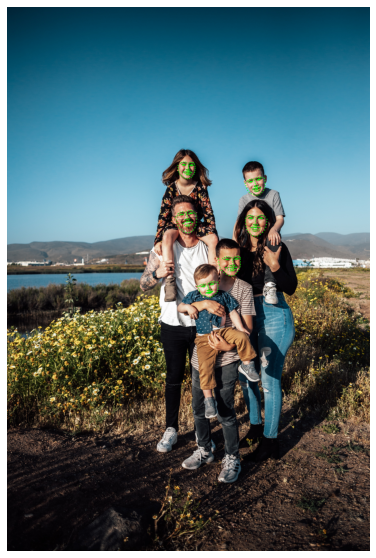

In [15]:
imshow(faces_keypoints, "bgr")

In [16]:
imshow_cv2("faces_keypoints", faces_keypoints)

### Test with camera

In [17]:
# draw all the keypoints from range on camera
# kp_range = range(0, 68)
kp_range = range(36, 48)

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # left point
        x1 = face.left()
        # top point
        y1 = face.top()
        # right point
        x2 = face.right()
        # bottom point
        y2 = face.bottom()
    
        # create landmark object
        landmarks = predictor(image=gray, box=face)

        # loop through all the points
        for n in kp_range:
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            # Draw a circle
            cv2.circle(img=frame, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Student hat on photo

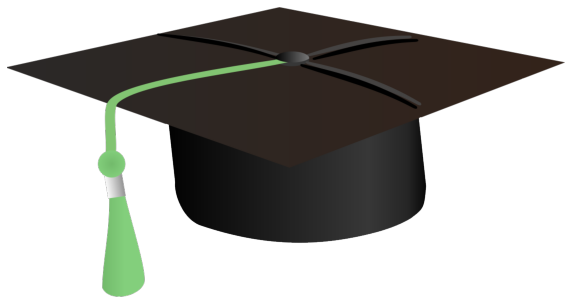

In [18]:
# read student hat with transparency
student_hat = cv2.imread("images/student_hat.png", cv2.IMREAD_UNCHANGED)
imshow(student_hat, "gray")

In [19]:
def scale_img(img, scale):
    img_height = img.shape[0]
    img_width = img.shape[1]
    new_height = int(scale * img_height)
    new_width = int(scale * img_width)
    return cv2.resize(img, (new_width, new_height))

In [20]:
scale = 0.5
scaled_hat = scale_img(student_hat, scale)
print(student_hat.shape)
print(scaled_hat.shape)

(621, 1196, 4)
(310, 598, 4)


In [21]:
hat_height = student_hat.shape[0]
hat_width = student_hat.shape[1]

In [22]:
def check_out_of_frame(x1, x2, y1, y2, img, img_small=None):
    height = img.shape[0]
    width = img.shape[1]
    
    x1_new = max(x1, 0)
    x2_new = min(x2, width)
    y1_new = max(y1, 0)
    y2_new = min(y2, height)

    if img_small is not None:
        height_sm = img_small.shape[0]
        width_sm = img_small.shape[1]
        x1_sm = x1_new - x1
        x2_sm = width_sm - (x2 - x2_new)
        y1_sm = y1_new - y1
        y2_sm = height_sm - (y2 - y2_new)
    
        img_small = img_small[y1_sm:y2_sm, x1_sm:x2_sm]

    return x1_new, x2_new, y1_new, y2_new, img_small

In [23]:
def overlay_with_png(img, img_small, x1, x2, y1, y2):
    alpha_s = img_small[:, :, 3] / 255.0
    alpha_l = 1.0 - alpha_s

    for c in range(3):
        img[y1:y2, x1:x2, c] = (alpha_s * img_small[:, :, c] + alpha_l * img[y1:y2, x1:x2, c])

In [24]:
# use detector to find landmarks
faces = detector(people_gray)
faces

rectangles[[(2372, 2057) (2630, 2315)], [(1727, 1528) (1906, 1707)], [(2144, 2478) (2359, 2693)], [(2383, 1690) (2598, 1905)], [(1690, 2024) (1905, 2239)], [(1929, 2717) (2144, 2932)]]

In [25]:
# show hat over the face
width_scale = 3
people_hat = people.copy()
for face in faces:
    # left point
    x1 = face.left()
    # top point
    y1 = face.top()
    # right point
    x2 = face.right()
    # bottom point
    y2 = face.bottom()
        
    height = x2 - x1
    width = y2 - y1
    
    scale = width_scale * width / hat_width
    hat_scaled = scale_img(student_hat, scale)

    height_scaled = hat_scaled.shape[0]
    width_scaled = hat_scaled.shape[1]
    
    hat_x1 = x1 + int(width / 2) - int(width_scaled / 2)
    hat_x2 = hat_x1 + width_scaled
    hat_y1 = y1 - height - 15
    hat_y2 = hat_y1 + height_scaled
    
    hat_x1, hat_x2, hat_y1, hat_y2, hat_scaled = check_out_of_frame(hat_x1, hat_x2, hat_y1, hat_y2, people_hat, hat_scaled)
    
    overlay_with_png(people_hat, hat_scaled, hat_x1, hat_x2, hat_y1, hat_y2)
    
#     cv2.rectangle(img=people_hat, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=5)
#     cv2.rectangle(img=people_hat, pt1=(hat_x1, hat_y1), pt2=(hat_x2, hat_y2), color=(255, 0, 0), thickness=10)

In [26]:
imshow_cv2("hat", people_hat)

### Mask on photo

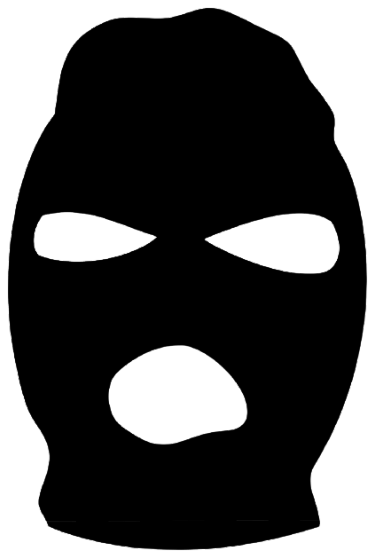

In [27]:
# read face mask with transparency
face_mask = cv2.imread("images/mask.png", cv2.IMREAD_UNCHANGED)
imshow(face_mask, "gray")

In [28]:
mask_height = face_mask.shape[0]
mask_width = face_mask.shape[1]

In [29]:
# use detector to find landmarks
faces = detector(people_gray)
faces

rectangles[[(2372, 2057) (2630, 2315)], [(1727, 1528) (1906, 1707)], [(2144, 2478) (2359, 2693)], [(2383, 1690) (2598, 1905)], [(1690, 2024) (1905, 2239)], [(1929, 2717) (2144, 2932)]]

In [30]:
# show with mask on the face
width_scale = 1.25
people_masked = people.copy()
for face in faces:
    # left point
    x1 = face.left()
    # top point
    y1 = face.top()
    # right point
    x2 = face.right()
    # bottom point
    y2 = face.bottom()
        
    height = x2 - x1
    width = y2 - y1

    scale = width_scale * width / mask_width
    mask_scaled = scale_img(face_mask, scale)

    height_scaled = mask_scaled.shape[0]
    width_scaled = mask_scaled.shape[1]
    
    mask_x1 = x1 + int(width / 2) - int(width_scaled / 2)
    mask_x2 = mask_x1 + width_scaled
    mask_y1 = y1 + int(height / 2) - int(height_scaled / 2) - 25
    mask_y2 = mask_y1 + height_scaled
    
    mask_x1, mask_x2, mask_y1, mask_y2, mask_scaled = check_out_of_frame(
        mask_x1, mask_x2, mask_y1, mask_y2, people_masked, mask_scaled)
    
    overlay_with_png(people_masked, mask_scaled, mask_x1, mask_x2, mask_y1, mask_y2)
    
#     cv2.rectangle(img=people_masked, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=5)
#     cv2.rectangle(img=people_masked, pt1=(mask_x1, mask_y1), pt2=(mask_x2, mask_y2), color=(255, 0, 0), thickness=10)

In [31]:
imshow_cv2("masked", people_masked)

### Mask on photo with transformations

In [32]:
# face keypoints: left eye corner, right eye corner, lips bottom
face_points = [36, 45, 57]

In [33]:
def get_mask_points(mask):
    h = mask.shape[0]
    w = mask.shape[1]
    left_eye_x = int(0.15 * w)
    left_eye_y = int(0.4 * h)
    right_eye_x = int(0.8 * w)
    right_eye_y = int(0.4 * h)
    lips_x = int(0.5 * w)
    lips_y = int(0.75 * h)
    return np.float32([[left_eye_x, left_eye_y], [right_eye_x, right_eye_y], [lips_x, lips_y]])

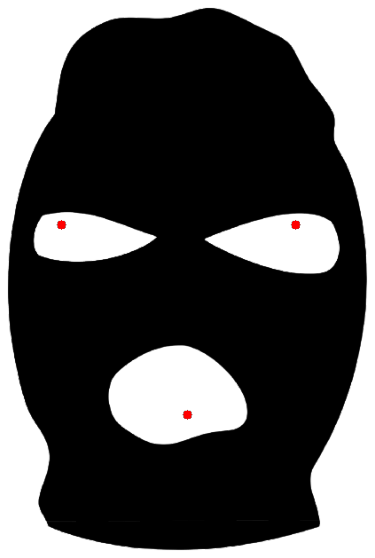

In [34]:
# mark keypoints on mask
mask_kp = face_mask.copy()
mask_points = get_mask_points(mask_kp)
for mask_point in mask_points:
    cv2.circle(img=mask_kp, center=mask_point.astype("int"), radius=5, color=(255, 0, 0, 255), thickness=-1)
imshow(mask_kp, "gray")

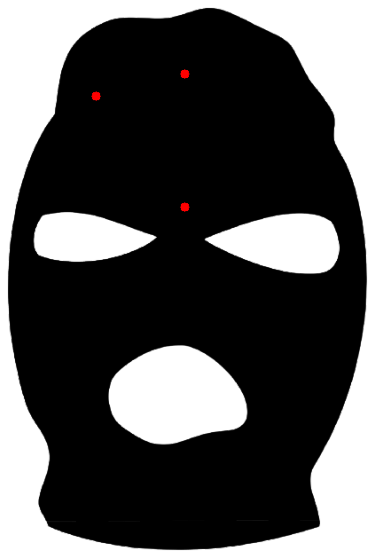

In [35]:
mask_new_kp = face_mask.copy()
mask_new_points = np.float32([[100, 100], [200, 75], [200, 225]])
for mask_point in mask_new_points:
    cv2.circle(img=mask_new_kp, center=mask_point.astype("int"), radius=5, color=(255, 0, 0, 255), thickness=-1)
imshow(mask_new_kp, "gray")

In [36]:
M = cv2.getAffineTransform(mask_points, mask_new_points)
M

array([[  0.37878788,   0.21594449,  23.98753894],
       [ -0.09469697,   0.64694846, -52.7258567 ]])

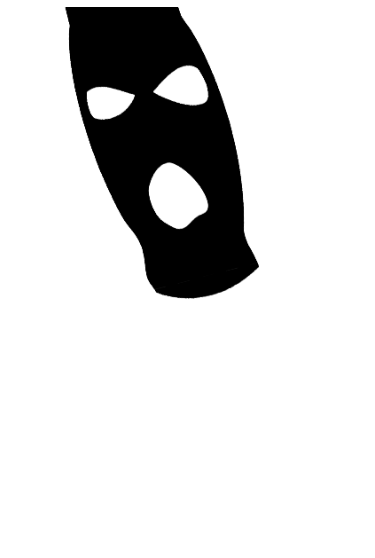

In [37]:
mask_warped = cv2.warpAffine(face_mask, M=M, dsize=(mask_width, mask_height))
imshow(mask_warped)

In [38]:
padding = 100
M = cv2.getAffineTransform(mask_points, mask_new_points + padding)
M

array([[ 3.78787879e-01,  2.15944492e-01,  1.23987539e+02],
       [-9.46969697e-02,  6.46948457e-01,  4.72741433e+01]])

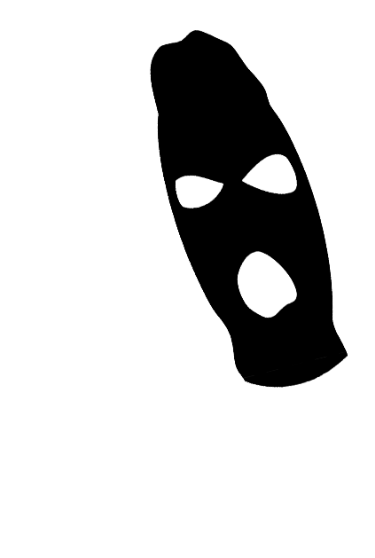

In [39]:
mask_warped = cv2.warpAffine(face_mask, M=M, dsize=(mask_width, mask_height))
imshow(mask_warped)

In [40]:
# use detector to find landmarks
faces = detector(people_gray)
faces

rectangles[[(2372, 2057) (2630, 2315)], [(1727, 1528) (1906, 1707)], [(2144, 2478) (2359, 2693)], [(2383, 1690) (2598, 1905)], [(1690, 2024) (1905, 2239)], [(1929, 2717) (2144, 2932)]]

In [41]:
# show with mask on the face rotated
people_masked = people.copy()
width_scale = 1.25
padding = 100
for face in faces:
    # left, top, right, bottom points
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()       
    height = x2 - x1
    width = y2 - y1
    
    # look for the landmarks
    landmarks = predictor(image=people_gray, box=face)
    
    mask_new_points = []
    for i in face_points:
        mask_new_points.append([landmarks.part(i).x - x1, landmarks.part(i).y - y1])
    mask_new_points = np.float32(mask_new_points)

    M = cv2.getAffineTransform(mask_points, mask_new_points + padding)    
    mask_warped = cv2.warpAffine(face_mask, M=M, dsize=(width + 2 * padding, height + 2 * padding))

    mask_scaled = scale_img(mask_warped, width_scale)    
    height_scaled = mask_scaled.shape[0]
    width_scaled = mask_scaled.shape[1]
    
    mask_x1 = x1 + int(width / 2) - int(width_scaled / 2)
    mask_x2 = mask_x1 + width_scaled
    mask_y1 = y1 + int(height / 2) - int(height_scaled / 2)
    mask_y2 = mask_y1 + height_scaled
    
    mask_x1, mask_x2, mask_y1, mask_y2, mask_scaled = check_out_of_frame(
        mask_x1, mask_x2, mask_y1, mask_y2, people_masked, mask_scaled)
    
    overlay_with_png(people_masked, mask_scaled, mask_x1, mask_x2, mask_y1, mask_y2)

#     cv2.rectangle(img=people_masked, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=5)
#     cv2.rectangle(img=people_masked, pt1=(mask_x1, mask_y1), pt2=(mask_x2, mask_y2), color=(255, 0, 0), thickness=10)

In [42]:
imshow_cv2("masked", people_masked)

### Sunglasses on the photo

In [43]:
# face keypoints: left eyebrow corner, right eyebrow corner, nose middle
face_points = [17, 26, 29]

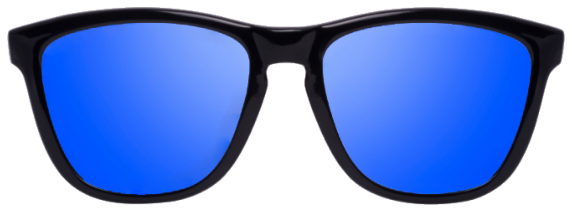

In [44]:
sunglasses = cv2.imread("images/sunglasses.png", cv2.IMREAD_UNCHANGED)
imshow(sunglasses, "bgr")

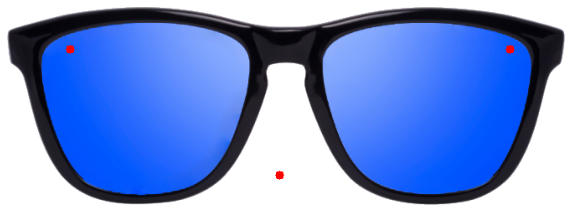

In [45]:
# mark keypoints on mask
glasses_kp = sunglasses.copy()
glasses_points = np.float32([[75, 50], [600, 50], [325, 200]])
for glasses_point in glasses_points:
    cv2.circle(img=glasses_kp, center=glasses_point.astype("int"), radius=5, color=(0, 0, 255, 255), thickness=-1)
imshow(glasses_kp, "bgr")

In [46]:
# use detector to find landmarks
faces = detector(people_gray)
faces

rectangles[[(2372, 2057) (2630, 2315)], [(1727, 1528) (1906, 1707)], [(2144, 2478) (2359, 2693)], [(2383, 1690) (2598, 1905)], [(1690, 2024) (1905, 2239)], [(1929, 2717) (2144, 2932)]]

In [47]:
# show with sunglasses on the face rotated
people_with_glasses = people.copy()
width_scale = 1
padding = 100
for face in faces:
    # left, top, right, bottom points
    x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()       
    height = x2 - x1
    width = y2 - y1
    
    # look for the landmarks
    landmarks = predictor(image=people_gray, box=face)
    
    glasses_new_points = []
    for i in face_points:
        glasses_new_points.append([landmarks.part(i).x - x1, landmarks.part(i).y - y1])
    glasses_new_points = np.float32(glasses_new_points)

    M = cv2.getAffineTransform(glasses_points, glasses_new_points + padding)    
    glasses_warped = cv2.warpAffine(sunglasses, M=M, dsize=(width + 2 * padding, height + 2 * padding))

    glasses_scaled = scale_img(glasses_warped, width_scale)    
    height_scaled = glasses_scaled.shape[0]
    width_scaled = glasses_scaled.shape[1]
    
    g_x1 = x1 + int(width / 2) - int(width_scaled / 2)
    g_x2 = g_x1 + width_scaled
    g_y1 = y1 + int(height / 2) - int(height_scaled / 2)
    g_y2 = g_y1 + height_scaled
    
    g_x1, g_x2, g_y1, g_y2, glasses_scaled = check_out_of_frame(
        g_x1, g_x2, g_y1, g_y2, people_with_glasses, glasses_scaled)
    
    overlay_with_png(people_with_glasses, glasses_scaled, g_x1, g_x2, g_y1, g_y2)

#     cv2.rectangle(img=people_with_glasses, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=5)
#     cv2.rectangle(img=people_with_glasses, pt1=(g_x1, g_y1), pt2=(g_x2, g_y2), color=(255, 0, 0), thickness=10)

In [48]:
imshow_cv2("glassed", people_with_glasses)

### Studen hat on the camera

In [49]:
# show hat over the face
width_scale = 2.5

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
         # left, top, right, bottom points
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()       
        height = x2 - x1
        width = y2 - y1
    
        scale = width_scale * width / hat_width
        hat_scaled = scale_img(student_hat, scale)

        height_scaled = hat_scaled.shape[0]
        width_scaled = hat_scaled.shape[1]

        hat_x1 = x1 + int(width / 2) - int(width_scaled / 2)
        hat_x2 = hat_x1 + width_scaled
        hat_y1 = y1 - height - 15
        hat_y2 = hat_y1 + height_scaled

        hat_x1, hat_x2, hat_y1, hat_y2, hat_scaled = check_out_of_frame(hat_x1, hat_x2, hat_y1, hat_y2, frame, hat_scaled)

        overlay_with_png(frame, hat_scaled, hat_x1, hat_x2, hat_y1, hat_y2)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Mask on the camera

In [50]:
# show with mask on the face rotated
width_scale = 1.25
padding = 100
# face keypoints: left eye corner, right eye corner, lips bottom
face_points = [36, 45, 57]

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # left, top, right, bottom points
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        height = x2 - x1
        width = y2 - y1

        # look for the landmarks
        landmarks = predictor(image=gray, box=face)

        mask_new_points = []
        for i in face_points:
            mask_new_points.append([landmarks.part(i).x - x1, landmarks.part(i).y - y1])
        mask_new_points = np.float32(mask_new_points)

        M = cv2.getAffineTransform(mask_points, mask_new_points + padding)
        mask_warped = cv2.warpAffine(face_mask, M=M, dsize=(width + 2 * padding, height + 2 * padding))

        mask_scaled = scale_img(mask_warped, width_scale)
        height_scaled = mask_scaled.shape[0]
        width_scaled = mask_scaled.shape[1]

        mask_x1 = x1 + int(width / 2) - int(width_scaled / 2)
        mask_x2 = mask_x1 + width_scaled
        mask_y1 = y1 + int(height / 2) - int(height_scaled / 2)
        mask_y2 = mask_y1 + height_scaled

        mask_x1, mask_x2, mask_y1, mask_y2, mask_scaled = check_out_of_frame(
            mask_x1, mask_x2, mask_y1, mask_y2, frame, mask_scaled)

        overlay_with_png(frame, mask_scaled, mask_x1, mask_x2, mask_y1, mask_y2)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Sunglasses on the camera

In [51]:
# show with sunglasses on the face rotated
width_scale = 1
padding = 100
# face keypoints: left eyebrow corner, right eyebrow corner, nose middle
face_points = [17, 26, 29]

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # left, top, right, bottom points
        x1, y1, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        height = x2 - x1
        width = y2 - y1

        # look for the landmarks
        landmarks = predictor(image=gray, box=face)

        glasses_new_points = []
        for i in face_points:
            glasses_new_points.append([landmarks.part(i).x - x1, landmarks.part(i).y - y1])
        glasses_new_points = np.float32(glasses_new_points)

        M = cv2.getAffineTransform(glasses_points, glasses_new_points + padding)
        glasses_warped = cv2.warpAffine(sunglasses, M=M, dsize=(width + 2 * padding, height + 2 * padding))

        glasses_scaled = scale_img(glasses_warped, width_scale)
        height_scaled = glasses_scaled.shape[0]
        width_scaled = glasses_scaled.shape[1]

        g_x1 = x1 + int(width / 2) - int(width_scaled / 2)
        g_x2 = g_x1 + width_scaled
        g_y1 = y1 + int(height / 2) - int(height_scaled / 2)
        g_y2 = g_y1 + height_scaled

        g_x1, g_x2, g_y1, g_y2, glasses_scaled = check_out_of_frame(
            g_x1, g_x2, g_y1, g_y2, frame, glasses_scaled)

        overlay_with_png(frame, glasses_scaled, g_x1, g_x2, g_y1, g_y2)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Bigger eyes on the photo

In [52]:
elon = cv2.imread("images/elon.jpg")

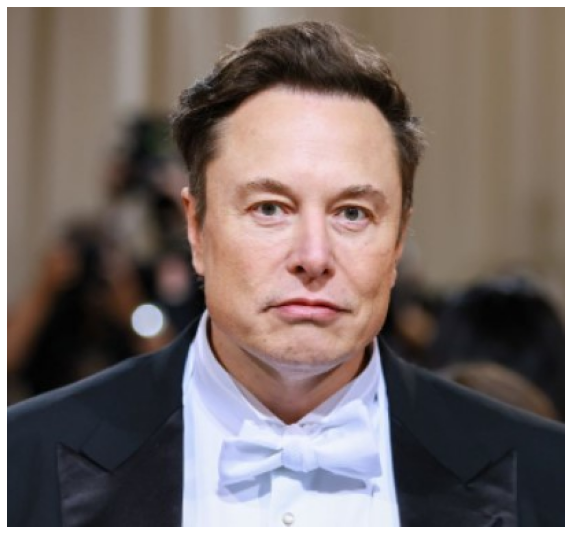

In [53]:
imshow(elon, "bgr")

In [54]:
elon_gray = cv2.cvtColor(elon, cv2.COLOR_RGB2GRAY)

In [76]:
# numbers of keypoints
left_eye_kp = range(36, 42)
right_eye_kp = range(42, 48)

In [77]:
faces = detector(elon_gray)

In [78]:
def blur_border(img, x1, x2, y1, y2, left, top, right, bottom, ksize, sigma):
    height, width = img.shape[:2]
    l1, l2 = x1 - left, x1 + left
    t1, t2 = y1 - top, y1 + top
    r1, r2 = x2 - right, x2 + right
    b1, b2 = y2 - bottom, y2 + bottom
    l1, t1, r1, b1 = tuple(map(lambda x: x if x > 0 else 0, (l1, t1, r1, b1)))
    l2, r2 = tuple(map(lambda x: x if x < width else width, (l2, r2)))
    t2, b2 = tuple(map(lambda x: x if x < height else height, (t2, b2)))
        
    # blur left part
    img[y1:y2, l1:l2] = cv2.GaussianBlur(src=img[y1:y2, l1:l2], ksize=ksize, sigmaX=sigma)
    # blur top part
    img[t1:t2, x1:x2] = cv2.GaussianBlur(src=img[t1:t2, x1:x2], ksize=ksize, sigmaX=sigma)
    # blur right part
    img[y1:y2, r1:r2] = cv2.GaussianBlur(src=img[y1:y2, r1:r2], ksize=ksize, sigmaX=sigma)
    # blur bottom part
    img[b1:b2, x1:x2] = cv2.GaussianBlur(src=img[b1:b2, x1:x2], ksize=ksize, sigmaX=sigma)

    return img

In [93]:
scale = 1.25
padding_x = 10
padding_y = 5
blur_padding = 3
blur_padding_top = 1
blur_ksize = (5, 5)
blur_sigma = 3
# scale = 0.85
# padding_x = 15
# padding_y = 10
# blur_padding = 7
# blur_padding_top = 1
# blur_ksize = (7, 7)
# blur_sigma = 3

elon_eyes = elon.copy()
for face in faces:
    # look for the landmarks
    landmarks = predictor(image=elon_gray, box=face)
    
    for eye_kp in (left_eye_kp, right_eye_kp):
        for i in eye_kp:
            x = landmarks.part(i).x
            y = landmarks.part(i).y

            # draw a circle
#             cv2.circle(img=elon_eyes, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)
        
        x_coords = list(map(lambda i: landmarks.part(i).x, eye_kp))
        y_coords = list(map(lambda i: landmarks.part(i).y, eye_kp))
        
        x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
        x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
        x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, elon_eyes)

        eye = elon_eyes[y1:y2, x1:x2]
        
        eye_scaled = scale_img(eye, scale)
        height, width = eye.shape[:2]
        height_scaled, width_scaled = eye_scaled.shape[:2]
        
        x1_new = x1 + int(width / 2) - int(width_scaled / 2)
        x2_new = x1_new + width_scaled
        y1_new = y1
        y2_new = y1_new + height_scaled
        x1_new, x2_new, y1_new, y2_new, eye_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, elon_eyes, eye_scaled)
        
        elon_eyes[y1_new:y2_new, x1_new:x2_new] = eye_scaled
        elon_eyes = blur_border(elon_eyes, x1_new, x2_new, y1_new, y2_new,
                                blur_padding, blur_padding_top, blur_padding, blur_padding,
                                blur_ksize, blur_sigma)
#         cv2.rectangle(img=elon_eyes, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

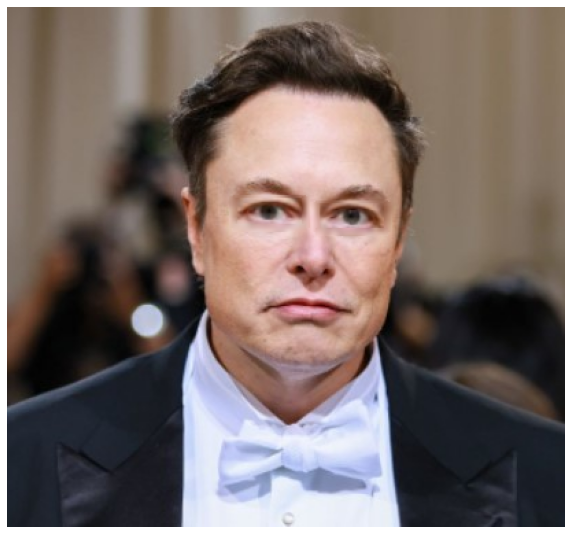

In [94]:
imshow(elon_eyes, "bgr")

### Bigger lips on the photo

In [60]:
# numbers of keypoints
lips_kp = range(48, 68)

In [61]:
faces = detector(elon_gray)

In [103]:
# scale = 1.25
# padding_x = 3
# padding_y = 3
# blur_padding = 3
# blur_padding_bottom = 1
# blur_ksize = (5, 5)
# blur_sigma = 3
scale = 0.85
padding_x = 10
padding_y = 5
blur_padding = 3
blur_padding_bottom = 1
blur_ksize = (9, 9)
blur_sigma = 3

elon_lips = elon.copy()
for face in faces:
    # look for the landmarks
    landmarks = predictor(image=elon_gray, box=face)
    
    for i in lips_kp:
        x = landmarks.part(i).x
        y = landmarks.part(i).y

        # draw a circle
#         cv2.circle(img=elon_lips, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)

    x_coords = list(map(lambda i: landmarks.part(i).x, lips_kp))
    y_coords = list(map(lambda i: landmarks.part(i).y, lips_kp))

    x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
    x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
    x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, elon_lips)

    lips = elon_lips[y1:y2, x1:x2]

    lips_scaled = scale_img(lips, scale)
    height, width = lips.shape[:2]
    height_scaled, width_scaled = lips_scaled.shape[:2]

    x1_new = x1 + int(width / 2) - int(width_scaled / 2)
    x2_new = x1_new + width_scaled
    y1_new = y1
    y2_new = y1_new + height_scaled
    x1_new, x2_new, y1_new, y2_new, lips_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, elon_lips, lips_scaled)

    elon_lips[y1_new:y2_new, x1_new:x2_new] = lips_scaled
    elon_lips = blur_border(elon_lips, x1_new, x2_new, y1_new, y2_new,
                            blur_padding, blur_padding, blur_padding, blur_padding_bottom,
                            blur_ksize, blur_sigma)
#     cv2.rectangle(img=elon_lips, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

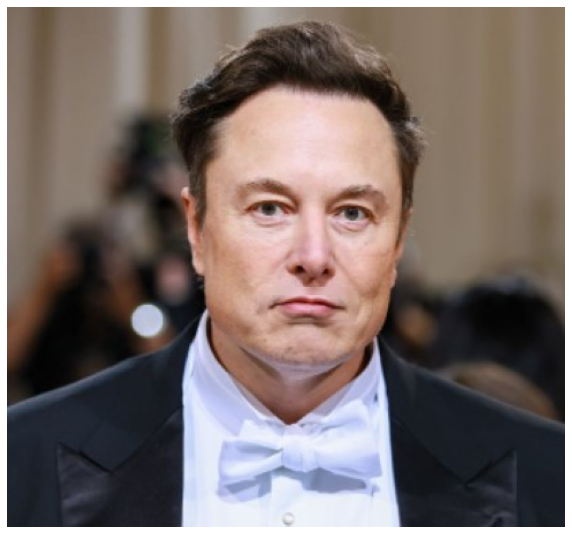

In [104]:
imshow(elon_lips, "bgr")

### Smaller nose on the photo

In [64]:
nose_kp = range(29, 36)

In [65]:
faces = detector(elon_gray)

In [127]:
# scale = 1.25
# padding_x = 10
# padding_y = 3
# blur_padding = 3
# blur_padding_bottom = 1
# blur_ksize = (5, 5)
# blur_sigma = 3
scale = 0.85
padding_x = 10
padding_y = 2
blur_padding = 2
blur_padding_bottom = 1
blur_ksize = (5, 5)
blur_sigma = 3

elon_nose = elon.copy()
for face in faces:
    # look for the landmarks
    landmarks = predictor(image=elon_gray, box=face)
    
    for i in nose_kp:
        x = landmarks.part(i).x
        y = landmarks.part(i).y

        # draw a circle
#         cv2.circle(img=elon_nose, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)

    x_coords = list(map(lambda i: landmarks.part(i).x, nose_kp))
    y_coords = list(map(lambda i: landmarks.part(i).y, nose_kp))

    x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
    x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
    x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, elon_nose)

    nose = elon_nose[y1:y2, x1:x2]

    nose_scaled = scale_img(nose, scale)
    height, width = nose.shape[:2]
    height_scaled, width_scaled = nose_scaled.shape[:2]

    x1_new = x1 + int(width / 2) - int(width_scaled / 2)
    x2_new = x1_new + width_scaled
    y1_new = y1
    y2_new = y1_new + height_scaled
    x1_new, x2_new, y1_new, y2_new, nose_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, elon_nose, nose_scaled)

    elon_nose[y1_new:y2_new, x1_new:x2_new] = nose_scaled
    elon_nose = blur_border(elon_nose, x1_new, x2_new, y1_new, y2_new,
                            blur_padding, blur_padding, blur_padding, blur_padding_bottom,
                            blur_ksize, blur_sigma)
#     cv2.rectangle(img=elon_nose, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

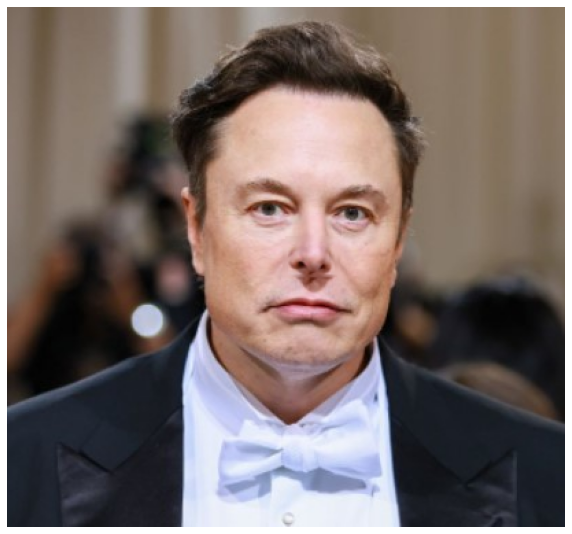

In [128]:
imshow(elon_nose, "bgr")

### Bigger eyes on the camera

In [68]:
# numbers of keypoints
left_eye = range(36, 42)
right_eye = range(42, 48)

In [69]:
scale = 1.25
padding_x = 10
padding_y = 5
blur_padding = 3
blur_padding_top = 1
blur_ksize = (5, 5)
blur_sigma = 3
# scale = 0.75
# padding_x = 20
# padding_y = 15
# blur_padding = 10
# blur_padding_top = 1
# blur_ksize = (7, 7)
# blur_sigma = 3

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # look for the landmarks
        landmarks = predictor(image=gray, box=face)

        for eye_kp in (left_eye_kp, right_eye_kp):
            for i in eye_kp:
                x = landmarks.part(i).x
                y = landmarks.part(i).y

                # draw a circle
            #             cv2.circle(img=elon_eyes, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)

            x_coords = list(map(lambda i: landmarks.part(i).x, eye_kp))
            y_coords = list(map(lambda i: landmarks.part(i).y, eye_kp))

            x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
            x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
            x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, frame)

            eye = frame[y1:y2, x1:x2]

            eye_scaled = scale_img(eye, scale)
            height, width = eye.shape[:2]
            height_scaled, width_scaled = eye_scaled.shape[:2]

            x1_new = x1 + int(width / 2) - int(width_scaled / 2)
            x2_new = x1_new + width_scaled
            y1_new = y1
            y2_new = y1_new + height_scaled
            x1_new, x2_new, y1_new, y2_new, eye_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, frame,
                                                                            eye_scaled)

            frame[y1_new:y2_new, x1_new:x2_new] = eye_scaled
            elon_eyes = blur_border(frame, x1_new, x2_new, y1_new, y2_new,
                                    blur_padding, blur_padding_top, blur_padding, blur_padding,
                                    blur_ksize, blur_sigma)
    #         cv2.rectangle(img=elon_eyes, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Bigger lips on the camera

In [70]:
# numbers of keypoints
lips_kp = range(48, 68)

In [71]:
scale = 1.25
padding_x = 3
padding_y = 3
blur_padding = 3
blur_padding_bottom = 1
blur_ksize = (5, 5)
blur_sigma = 3
# scale = 0.85
# padding_x = 20
# padding_y = 10
# blur_padding = 5
# blur_padding_bottom = 5
# blur_ksize = (9, 9)
# blur_sigma = 3

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # look for the landmarks
        landmarks = predictor(image=gray, box=face)

        for i in lips_kp:
            x = landmarks.part(i).x
            y = landmarks.part(i).y

            # draw a circle
            # cv2.circle(img=elon_lips, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)

        x_coords = list(map(lambda i: landmarks.part(i).x, lips_kp))
        y_coords = list(map(lambda i: landmarks.part(i).y, lips_kp))

        x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
        x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
        x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, frame)

        lips = frame[y1:y2, x1:x2]

        lips_scaled = scale_img(lips, scale)
        height, width = lips.shape[:2]
        height_scaled, width_scaled = lips_scaled.shape[:2]

        x1_new = x1 + int(width / 2) - int(width_scaled / 2)
        x2_new = x1_new + width_scaled
        y1_new = y1
        y2_new = y1_new + height_scaled
        x1_new, x2_new, y1_new, y2_new, lips_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, frame,
                                                                        lips_scaled)

        frame[y1_new:y2_new, x1_new:x2_new] = lips_scaled
        frame = blur_border(frame, x1_new, x2_new, y1_new, y2_new,
                            blur_padding, blur_padding, blur_padding, blur_padding_bottom,
                            blur_ksize, blur_sigma)
        # cv2.rectangle(img=elon_lips, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()

### Smaller nose on the camera

In [72]:
# numbers of keypoints
nose_kp = range(29, 36)

In [73]:
# scale = 1.25
# padding_x = 10
# padding_y = 3
# blur_padding = 3
# blur_padding_bottom = 1
# blur_ksize = (5, 5)
# blur_sigma = 3
scale = 0.85
padding_x = 20
padding_y = 10
blur_padding = 5
blur_padding_bottom = 5
blur_ksize = (9, 9)
blur_sigma = 3

# read the camera image
cap = cv2.VideoCapture(0)

# press escape to break
while True:
    _, frame = cap.read()
    # convert image into grayscale
    gray = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2GRAY)

    # use detector to find landmarks
    faces = detector(gray)

    for face in faces:
        # look for the landmarks
        landmarks = predictor(image=gray, box=face)

        for i in nose_kp:
            x = landmarks.part(i).x
            y = landmarks.part(i).y

            # draw a circle
            # cv2.circle(img=elon_nose, center=(x, y), radius=2, color=(0, 255, 0), thickness=-1)

        x_coords = list(map(lambda i: landmarks.part(i).x, nose_kp))
        y_coords = list(map(lambda i: landmarks.part(i).y, nose_kp))

        x1, x2, y1, y2 = min(x_coords), max(x_coords), min(y_coords), max(y_coords)
        x1, x2, y1, y2 = x1 - padding_x, x2 + padding_x, y1 - padding_y, y2 + padding_y
        x1, x2, y1, y2, _ = check_out_of_frame(x1, x2, y1, y2, frame)

        nose = frame[y1:y2, x1:x2]

        nose_scaled = scale_img(nose, scale)
        height, width = nose.shape[:2]
        height_scaled, width_scaled = nose_scaled.shape[:2]

        x1_new = x1 + int(width / 2) - int(width_scaled / 2)
        x2_new = x1_new + width_scaled
        y1_new = y1
        y2_new = y1_new + height_scaled
        x1_new, x2_new, y1_new, y2_new, nose_scaled = check_out_of_frame(x1_new, x2_new, y1_new, y2_new, frame,
                                                                         nose_scaled)

        frame[y1_new:y2_new, x1_new:x2_new] = nose_scaled
        frame = blur_border(frame, x1_new, x2_new, y1_new, y2_new,
                            blur_padding, blur_padding, blur_padding, blur_padding_bottom,
                            blur_ksize, blur_sigma)
        # cv2.rectangle(img=elon_nose, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=1)

    # show the image
    cv2.imshow(winname="Face", mat=frame)

    # exit when escape is pressed
    if cv2.waitKey(delay=1) == 27:
        break

# when everything done, release the video capture and video write objects
cap.release()

# close all windows
cv2.destroyAllWindows()